In [1]:
import pickle
import numpy as np
import pandas as pd
obddata = pd.read_csv("1.csv", index_col=0)

<IPython.core.display.Javascript object>


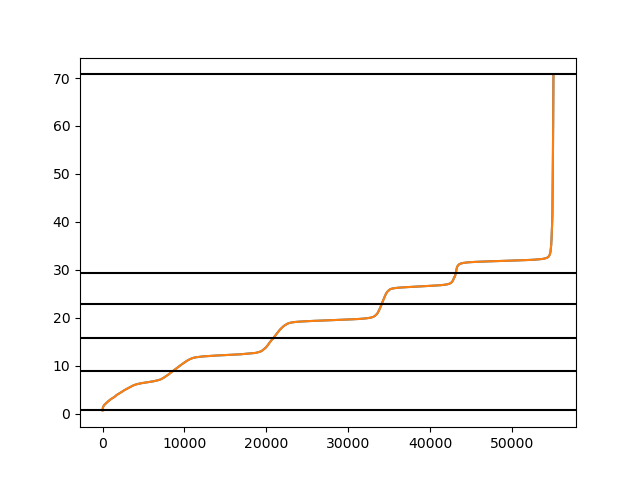

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt

df_ratio = pd.DataFrame
df_ratio = obddata['speed'] / obddata['rpm']
df_ratio = df_ratio.fillna(0)
df_ratio = df_ratio[df_ratio != 0]
df_ratio = df_ratio * 1000
df_ratio.replace(np.inf, np.nan).fillna(0)

sorted_data = df_ratio.sort_values().reset_index(drop=True)
plt.plot(sorted_data)

# Jenks Method

In [7]:
# Apply thr Jenks method to find the classifiers so that there are in total 5 classifiers
import jenkspy
breaks = jenkspy.jenks_breaks(sorted_data, 5)

print(breaks)

[0.6722689075630253, 8.865903213889915, 15.734989648033125, 22.900763358778626, 29.306930693069305, 70.75236671649228]


**Jenks Natural Breaks Method:** The Jenks Natural Breaks method is a classification technique used to partition a dataset into natural groupings or classes based on the inherent data patterns. It seeks to minimize the variance within each class while maximizing the variance between classes.
This method minimizes the variation within each range, so the areas within each range are as close as possible in value to each other.

In [5]:
sorted_data

0        0.672269
1        0.692521
2        0.730194
3        0.814664
4        0.826788
           ...   
55039         inf
55040         inf
55041         inf
55042         inf
55043         inf
Length: 55044, dtype: float64

In [6]:
# Assuming 'sorted_data' is your input data
sorted_data = np.array(sorted_data)  # Convert to NumPy array if it's not already

# Remove non-finite values (NaN and infinite)
sorted_data = sorted_data[np.isfinite(sorted_data)]

# Alternatively, replace non-finite values with 0
# sorted_data[~np.isfinite(sorted_data)] = 0

In [8]:
# Display the breaks as lines parallel to the x axis on the graph
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(sorted_data)

for br in breaks:
    plt.axhline(y = br, color = 'black')

plt.show()

**The result is a line chart where the horizontal black lines represent the breakpoints, visually showing how the data is divided into different classes or ranges based on these thresholds. This can be helpful for understanding how the Jenks Natural Breaks method has categorized the data. (Plotted on above graph itself).**